1. Load the arrays

In [1]:
import numpy as np

paths = [
    r"C:\Self Learning\Research Papers\UOW Research Papers\eSport Players with EEG Data\EEG Data\Amin\amin_eeg_labels.npy",
    r"C:\Self Learning\Research Papers\UOW Research Papers\eSport Players with EEG Data\EEG Data\Amin1\amin-1_eeg_labels.npy",
    r"C:\Self Learning\Research Papers\UOW Research Papers\eSport Players with EEG Data\EEG Data\Ismayil\ismyil_eeg_labels.npy",
    r"C:\Self Learning\Research Papers\UOW Research Papers\eSport Players with EEG Data\EEG Data\Marjan\marjan_eeg_labels.npy",
    r"C:\Self Learning\Research Papers\UOW Research Papers\eSport Players with EEG Data\EEG Data\Mina\mina_eeg_labels.npy",
    r"C:\Self Learning\Research Papers\UOW Research Papers\eSport Players with EEG Data\EEG Data\Mina 1\mina-1_eeg_labels.npy",
    r"C:\Self Learning\Research Papers\UOW Research Papers\eSport Players with EEG Data\EEG Data\Mina 3\mina-3_eeg_labels.npy",
    r"C:\Self Learning\Research Papers\UOW Research Papers\eSport Players with EEG Data\EEG Data\Mohammad\mohommad_eeg_labels.npy",
    r"C:\Self Learning\Research Papers\UOW Research Papers\eSport Players with EEG Data\EEG Data\Mona\mona_eeg_labels.npy",
    r"C:\Self Learning\Research Papers\UOW Research Papers\eSport Players with EEG Data\EEG Data\Cole\cole_eeg_labels.npy",
    r"C:\Self Learning\Research Papers\UOW Research Papers\eSport Players with EEG Data\EEG Data\Daniel\daniel_eeg_labels.npy",
    r"C:\Self Learning\Research Papers\UOW Research Papers\eSport Players with EEG Data\EEG Data\Jack\jack_eeg_labels.npy",
    r"C:\Self Learning\Research Papers\UOW Research Papers\eSport Players with EEG Data\EEG Data\James\james_eeg_labels.npy",
    r"C:\Self Learning\Research Papers\UOW Research Papers\eSport Players with EEG Data\EEG Data\Josh\josh_eeg_labels.npy",
    r"C:\Self Learning\Research Papers\UOW Research Papers\eSport Players with EEG Data\EEG Data\Max\max_eeg_labels.npy",
    r"C:\Self Learning\Research Papers\UOW Research Papers\eSport Players with EEG Data\EEG Data\Roddy\roddy_eeg_labels.npy",
    r"C:\Self Learning\Research Papers\UOW Research Papers\eSport Players with EEG Data\EEG Data\Sam\sam_eeg_labels.npy",
    r"C:\Self Learning\Research Papers\UOW Research Papers\eSport Players with EEG Data\EEG Data\adam\adam_eeg_labels.npy",
]

def head_along_first_axis(arr, n=5):
    if arr.ndim == 0:
        return arr  # scalar
    idx = (slice(0, min(n, arr.shape[0])),) + (slice(None),) * (arr.ndim - 1)
    return arr[idx]

for p in paths:
    print("\n" + "-"*88)
    print(p)
    try:
        # allow_pickle=True in case labels are object arrays (e.g., strings)
        arr = np.load(p, allow_pickle=True)
        print(f"Loaded: shape={arr.shape}, dtype={arr.dtype}")
        preview = head_along_first_axis(arr, n=5)
        print("First 5 lines (along axis 0):")
        print(preview)
    except FileNotFoundError:
        print("File not found.")
    except Exception as e:
        print(f"Error reading file: {e}")



----------------------------------------------------------------------------------------
C:\Self Learning\Research Papers\UOW Research Papers\eSport Players with EEG Data\EEG Data\Amin\amin_eeg_labels.npy
Loaded: shape=(265,), dtype=int64
First 5 lines (along axis 0):
[0 0 0 0 0]

----------------------------------------------------------------------------------------
C:\Self Learning\Research Papers\UOW Research Papers\eSport Players with EEG Data\EEG Data\Amin1\amin-1_eeg_labels.npy
Loaded: shape=(265,), dtype=int64
First 5 lines (along axis 0):
[0 0 0 0 0]

----------------------------------------------------------------------------------------
C:\Self Learning\Research Papers\UOW Research Papers\eSport Players with EEG Data\EEG Data\Ismayil\ismyil_eeg_labels.npy
Loaded: shape=(265,), dtype=int64
First 5 lines (along axis 0):
[0 0 0 0 0]

----------------------------------------------------------------------------------------
C:\Self Learning\Research Papers\UOW Research Papers\eSp

2. Concatenate arrays

In [2]:
# Concatenate all label arrays in the exact order given above
arrays = []
for p in paths:
    a = np.load(p, allow_pickle=True)   # keep order; don't shuffle
    a = np.asarray(a).reshape(-1)       # ensure 1D
    arrays.append(a)
    print(f"{p} -> {a.shape}")

labels_all = np.concatenate(arrays, axis=0)
print("Concatenated shape:", labels_all.shape)

# sanity check
assert labels_all.shape == (4770,), f"Expected (4770,), got {labels_all.shape}"

# (optional) save:
# np.save(r"C:\Self Learning\Research Papers\UOW Research Papers\eSport Players with EEG Data\EEG Data\all_eeg_labels.npy", labels_all)


C:\Self Learning\Research Papers\UOW Research Papers\eSport Players with EEG Data\EEG Data\Amin\amin_eeg_labels.npy -> (265,)
C:\Self Learning\Research Papers\UOW Research Papers\eSport Players with EEG Data\EEG Data\Amin1\amin-1_eeg_labels.npy -> (265,)
C:\Self Learning\Research Papers\UOW Research Papers\eSport Players with EEG Data\EEG Data\Ismayil\ismyil_eeg_labels.npy -> (265,)
C:\Self Learning\Research Papers\UOW Research Papers\eSport Players with EEG Data\EEG Data\Marjan\marjan_eeg_labels.npy -> (265,)
C:\Self Learning\Research Papers\UOW Research Papers\eSport Players with EEG Data\EEG Data\Mina\mina_eeg_labels.npy -> (265,)
C:\Self Learning\Research Papers\UOW Research Papers\eSport Players with EEG Data\EEG Data\Mina 1\mina-1_eeg_labels.npy -> (265,)
C:\Self Learning\Research Papers\UOW Research Papers\eSport Players with EEG Data\EEG Data\Mina 3\mina-3_eeg_labels.npy -> (265,)
C:\Self Learning\Research Papers\UOW Research Papers\eSport Players with EEG Data\EEG Data\Mohamma

3. Get the unique values of the arrays

In [7]:
# Number of unique values in the concatenated array
uniq_vals, counts = np.unique(labels_all, return_counts=True)
print("Unique count:", uniq_vals.size)

# (optional) see the values and their frequencies
for v, c in zip(uniq_vals, counts):
    print(f"{v}: {c}")


Unique count: 2
0: 2385
1: 2385


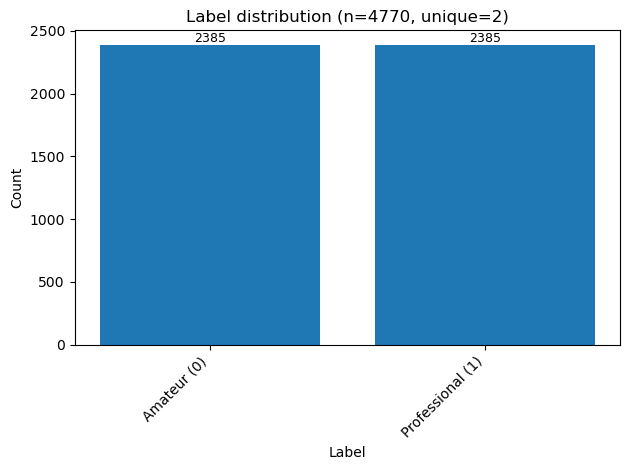

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Recompute (or reuse) the distribution
uniq_vals, counts = np.unique(labels_all, return_counts=True)

# Helper to format label names with codes
def pretty_with_code(v):
    # normalize to string for display, but detect 0/1 whether int-like or string
    try:
        code = int(v)
    except (ValueError, TypeError):
        code = None
    if code == 0:
        return "Amateur (0)"
    elif code == 1:
        return "Professional (1)"
    else:
        return str(v)

pretty_labels = [pretty_with_code(v) for v in uniq_vals]

# Plot with names and codes on x-axis
fig, ax = plt.subplots()
ax.bar(range(len(uniq_vals)), counts)
ax.set_xticks(range(len(uniq_vals)))
ax.set_xticklabels(pretty_labels, rotation=45, ha='right')
ax.set_xlabel("Label")
ax.set_ylabel("Count")
ax.set_title(f"Label distribution (n={labels_all.size}, unique={uniq_vals.size})")

# annotate bars with counts
for i, c in enumerate(counts):
    ax.text(i, c, str(c), ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


4. Save the final array

In [12]:
import os
import numpy as np

# Ensure destination folder exists
dest_dir = r"C:\Self Learning\Research Papers\UOW Research Papers\eSport Players with EEG Data\EEG Data\final eeg data"
os.makedirs(dest_dir, exist_ok=True)

# Path to final file
out_path = os.path.join(dest_dir, "final_eeg_labels.npy")

# Optional sanity check
assert labels_all.shape == (4770,), f"Expected (4770,), got {labels_all.shape}"

# Save
np.save(out_path, labels_all)
print(f"Saved: {out_path}")


Saved: C:\Self Learning\Research Papers\UOW Research Papers\eSport Players with EEG Data\EEG Data\final eeg data\final_eeg_labels.npy
